In [120]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
# loading data
df = pd.read_csv("data.csv")

In [122]:
df.head(5)

,order_id,Teriyaki Steak,Maryland Fried Chicken,Hot Crab Dip,Lemon Squares,Chicken Paprika,Shrimp Pineapple Fried Rice,Easy Oven Baked Potatoes,Chicken With Pineapple,Orange-Poppy Seed Pound Cake,...,Spinach Salad with Avocado,Pea Salad,Chili Chicken,Eggplant Rollatini,Prune Nut Bars,Green Beans Salerno,Pasta Primavera,Savory Chicken Casserole,day_time,food_prep_time_minutes
0,2d11489f-919c-436d-8e7d-e25df44d9dfb,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9/3/2019 10:56,13
1,a747fe55-7bb0-4877-b080-9a3f89855c02,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,3,0,9/4/2019 21:59,38
2,9688cb3c-57a0-4e23-b10b-c674e346cce5,0,0,1,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,9/4/2019 12:50,24
3,a042f8e6-d433-4229-8b6b-304a1c14df98,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9/5/2019 20:48,14
4,fe4918d7-6e23-4605-8158-e5a89afc0614,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9/5/2019 14:06,25


The dataset gives the order ID, the menue items present in each order, and the date of the order was placed. The last column is the time required to process the order.

In [123]:
df.dtypes

order_id                    object
Teriyaki Steak               int64
Maryland Fried Chicken       int64
Hot Crab Dip                 int64
Lemon Squares                int64
                             ...  
Green Beans Salerno          int64
Pasta Primavera              int64
Savory Chicken Casserole     int64
day_time                    object
food_prep_time_minutes       int64
Length: 93, dtype: object

In [124]:
df['day_time'] = pd.to_datetime(df['day_time']) 

In [125]:
df['day_time'].dtypes

dtype('<M8[ns]')

In [126]:
print(df['day_time'].min(), df['day_time'].max())

2019-09-01 00:00:00 2019-09-07 23:59:00


In [127]:
df_time = df.sort_values(by = ['day_time'])

In [128]:
df_time['day_time']

42423   2019-09-01 00:00:00
22947   2019-09-01 00:01:00
62095   2019-09-01 00:01:00
29031   2019-09-01 00:01:00
8226    2019-09-01 00:01:00
                ...        
69686   2019-09-07 23:59:00
7011    2019-09-07 23:59:00
27609   2019-09-07 23:59:00
42994   2019-09-07 23:59:00
10771   2019-09-07 23:59:00
Name: day_time, Length: 80000, dtype: datetime64[ns]

In [129]:
df_time['date'] = df_time['day_time'].dt.date
df_time['hour'] = df_time['day_time'].dt.hour
df_by_date_hour = df_time['food_prep_time_minutes'].groupby([df_time['date'],df_time['hour']],
                                                            sort = False).mean()

In [130]:
df_by_date_hour

date        hour
2019-09-01  0       23.344828
            1       23.388350
            2       21.871795
            3       21.045455
            4       22.265625
                      ...    
2019-09-07  19      27.554945
            20      27.870472
            21      25.070981
            22      25.313725
            23      25.306043
Name: food_prep_time_minutes, Length: 168, dtype: float64

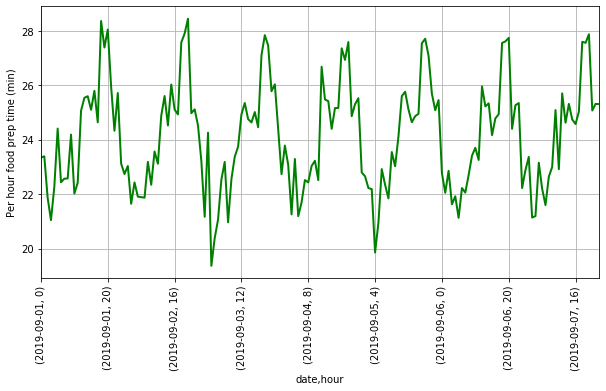

In [131]:
figure = plt.figure(figsize=(10,5))
df_by_date_hour.plot( color = 'green', linewidth=2)
plt.xticks( rotation=90 )
plt.ylabel('Per hour food prep time (min)')

plt.grid(True)

Text(0.5, 0, 'Hour')

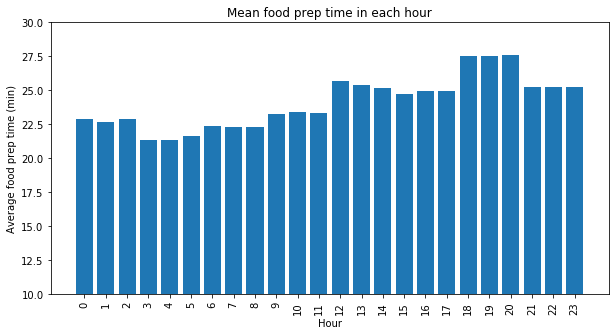

In [132]:
%matplotlib inline
figure = plt.figure(figsize = (10,5))
df_by_hour = df.groupby(df['day_time'].dt.hour , as_index=True).agg({'food_prep_time_minutes': 'mean'})
plt.ylim(10,30)
plt.bar(range(0,24,1), df_by_hour['food_prep_time_minutes'], align='center')

plt.xticks(range(0,24,1), rotation=90)
plt.ylabel('Average food prep time (min)')
plt.title('Mean food prep time in each hour')
plt.xlabel('Hour')


In [133]:
df_by_weekday = df.groupby(df['day_time'].dt.day_name() , as_index=True).agg({'food_prep_time_minutes': 'mean'})

In [134]:
df_by_weekday

,food_prep_time_minutes
day_time,
Friday,25.226962
Monday,25.280056
Saturday,25.264364
Sunday,25.372873
Thursday,25.246000
Tuesday,25.085990
Wednesday,25.242083


In [135]:
cats = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' ]
df_by_weekday = df_by_weekday.reindex(cats)
df_by_weekday

,food_prep_time_minutes
day_time,
Sunday,25.372873
Monday,25.280056
Tuesday,25.085990
Wednesday,25.242083
Thursday,25.246000
Friday,25.226962
Saturday,25.264364


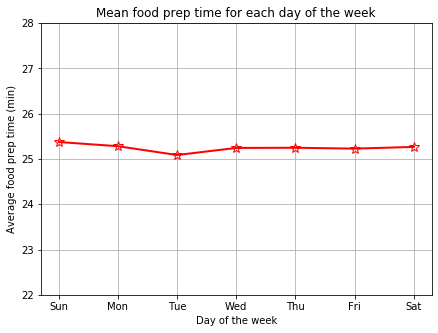

In [136]:
figure = plt.figure(figsize = (7,5))
plt.ylim(22,28)
n = (['Sun','Mon','Tue','Wed', 'Thu', 'Fri', 'Sat'])
plt.plot(n, df_by_weekday['food_prep_time_minutes'], '*-', linewidth=2, color = 'red', markersize=10, fillstyle= 'none')
plt.ylabel('Average food prep time (min)')
# plt.title('')
plt.xlabel('Day of the week')
plt.title('Mean food prep time for each day of the week')
plt.grid(True)

Text(0.5, 1.0, 'Total number of orders for each hour')

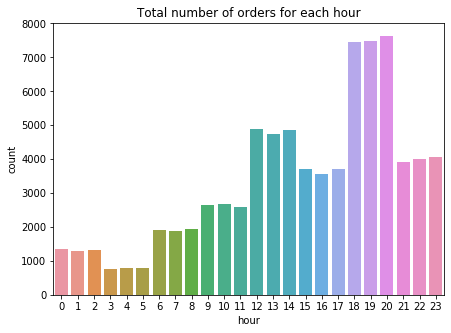

In [137]:
figure = plt.figure(figsize=(7,5))
sns.countplot(df_time['hour'], label = 'number of orders')
plt.title("Total number of orders for each hour")

### Feature selection


In [138]:
df['hour'] = df['day_time'].dt.hour

In [139]:
df['hour'].dtype

dtype('int64')

In [140]:
df['hour'] = df['hour'].astype(str)

In [141]:
df['hour'].dtype

dtype('O')

In [142]:
dummies = pd.get_dummies(df['hour'], prefix = 'hour')
print(dummies.shape)
dummies.head(3)

(80000, 24)


,hour_0,hour_1,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,...,hour_21,hour_22,hour_23,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
df = pd.concat([df, dummies], axis = 1)
df.drop(['hour', 'order_id','day_time'], axis = 1, inplace = True)
df.head(3)

,Teriyaki Steak,Maryland Fried Chicken,Hot Crab Dip,Lemon Squares,Chicken Paprika,Shrimp Pineapple Fried Rice,Easy Oven Baked Potatoes,Chicken With Pineapple,Orange-Poppy Seed Pound Cake,Egg Foo Young,...,hour_21,hour_22,hour_23,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
list(df.columns)

['Teriyaki Steak',
 'Maryland Fried Chicken',
 'Hot Crab Dip',
 'Lemon Squares',
 'Chicken Paprika',
 'Shrimp Pineapple Fried Rice',
 'Easy Oven Baked Potatoes',
 'Chicken With Pineapple',
 'Orange-Poppy Seed Pound Cake',
 'Egg Foo Young',
 'Bourbon Balls',
 'Old Fashioned Apple Pie',
 'Peanut Butter Cookies',
 'Sour Cream Raisin Pie',
 'Tortilla Soup',
 'Three Layer Chocolate Mayonnaise Cake',
 'Chinese Fried Rice',
 'Lemon Meringue Pie',
 'Snickerdoodles',
 'Chinese Beef',
 'Cucumbers in Sour Cream',
 'Cheese Strata',
 'Cheesy Fish Fillets with Spinach',
 'Garden Vegetable Pasta',
 'Chinese Pepper Steak',
 'Sweet and Sour Pork',
 'Broccoli Cheese Soup',
 'Chicken with Artichoke',
 'Easy Pasta Bake',
 'Cheesy Spinach Bake',
 'Garden Quiche',
 'Christmas Snowballs',
 'Chocolate Crisp Bran Cookies',
 'Crazy Crust Pizza',
 'Summer Fruit Salad',
 'Coq au Vin',
 'Hot Water Chocolate Cake',
 'Tamale Pie',
 'Horseradish Dressing',
 'Lemon Cloud Salad',
 'Saucy Shrimp Over Chinese Noodle Cake

To predict the food preparation time, features were selected as the 90 menu items and the hour of each order was placed. The variable 'hour' was considered as a categorical variable and was encoded into 24 dummy variables. The 'day of the week ' was not considered as a feature variable since there was no any significal different in average food preparation time over the days of the week.

In [145]:
df.to_csv("processed_data.csv", index=False)